In [11]:
# install tqdm
%pip install torch torchvision tqdm

In [12]:
import torch
import torch.nn.functional as F
from torch import nn

In [13]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)  # Fully connected layer 1
        self.fc2 = nn.Linear(50, num_classes)  # Fully connected layer 2
    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation
        x = self.fc2(x)  # Output layer
        return x

In [14]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

**Hyperparameters**
* Learning Rate: 0.001
* Batch Size: 64
* Epochs: 3
* Loss Function: CrossEntropyLoss (handles multi-class classification).
* Optimizer: Adam (adaptive learning rate optimization).


In [15]:
train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

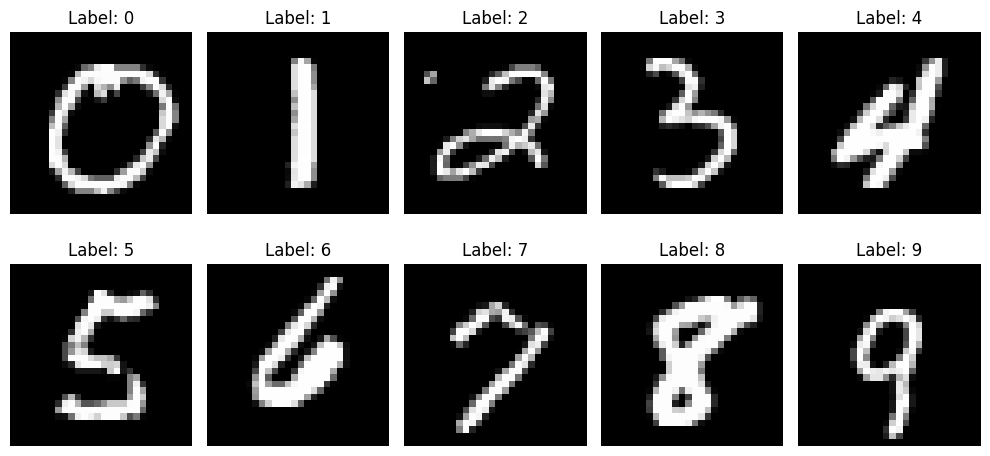

In [16]:
# Randomply show example foreach lable from train_dataset
import matplotlib.pyplot as plt
import random

# Create a dictionary to store one image per label
label_images = {}

# Keep track of found labels to ensure we find one for each
found_labels = set()

# Iterate through the dataset to find one image for each label randomly
while len(found_labels) < 10:  # Continue until we have images for all 10 labels
    random_index = random.randint(0, len(train_dataset) - 1)  # Generate a random index
    img, label = train_dataset[random_index]  # Get the image and label at that index

    if label not in found_labels:
        label_images[label] = img.squeeze()  # Store the image if the label is new
        found_labels.add(label)  # Add the label to the found_labels set

# Create a figure and subplots
fig, axs = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through the label_images dictionary in sorted order and display the images
for i, label in enumerate(sorted(label_images.keys())):
    img = label_images[label]
    axs[i // 5, i % 5].imshow(img, cmap='gray')  # Display the image in grayscale
    axs[i // 5, i % 5].set_title(f"Label: {label}")  # Set the title to the label
    axs[i // 5, i % 5].axis('off')  # Remove the axes

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork(input_size=784, num_classes=10).to(device)
print("device: ", device)

device:  cpu


In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for epoch in range(10):
    print(f"Epoch: {epoch}")
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Move data and targets to the selected device (CPU or GPU)
        data = data.to(device).reshape(data.shape[0], -1)  # Flatten images
        targets = targets.to(device)

        scores = model(data) # Forward pass
        loss = criterion(scores, targets)
        optimizer.zero_grad()  # Zero out the gradients from the previous step
        loss.backward()
        optimizer.step()

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9


| **Step** | **Formula** | **Description** |
| --- | ----------------------------------------- | --- |
| **Model forward pass** | $$\displaystyle \mathbf{z} = f(\mathbf{x}')$$ | Model computes raw output logits $\mathbf{z}$. |
| **Softmax** (implicit) | $$\displaystyle \hat{y}_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$ | Converts logits $\mathbf{z}$ to class probabilities $\hat{y}$. |
| **Cross-entropy loss** | $$\displaystyle \mathcal{L} = -\log(\hat{y}_{y}) = -\log\left(\frac{e^{z_y}}{\sum_{j=1}^{K} e^{z_j}}\right)$$ | Loss function penalizing wrong predictions. |
| **Gradient computation** | $$\displaystyle \frac{\partial \mathcal{L}}{\partial \theta}$$ | Backpropagation computes gradients w.r.t. parameters $\theta$. |
| **Adam update** | $$\displaystyle \theta_t = \theta_{t-1} - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$$ | Adam optimizer step using moment estimates. |



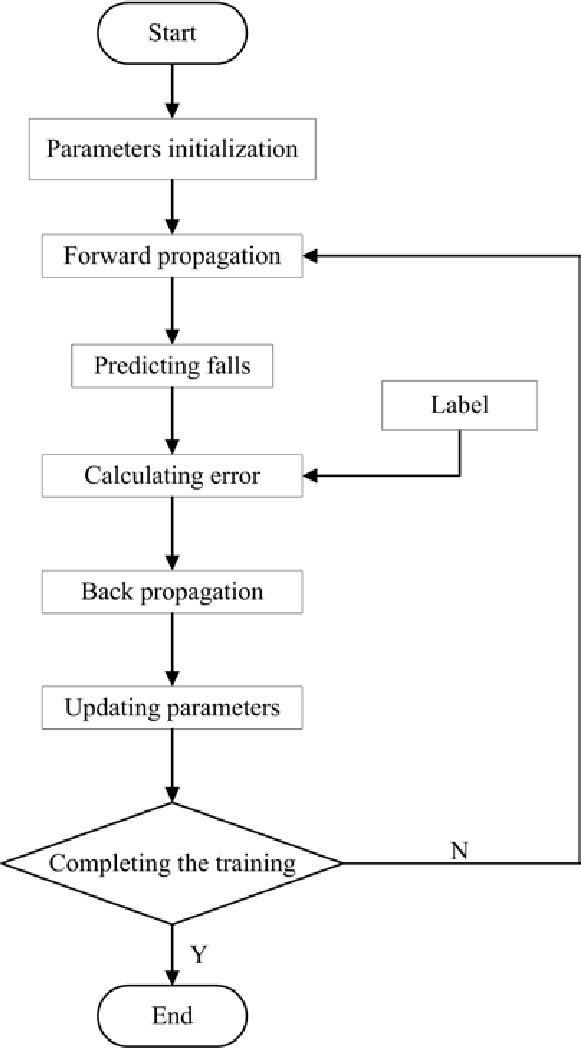

In [19]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device).reshape(x.shape[0], -1)
            y = y.to(device)
            scores = model(x)  # Get model predictions (scores)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
    model.train()
    return num_correct / num_samples
train_acc = check_accuracy(train_loader, model)
test_acc = check_accuracy(test_loader, model)
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Training Accuracy: 0.99
Test Accuracy: 0.97
